In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 28.7 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 155.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 135.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 88.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-linux_x86_64.whl size=303769 sha256=13461037e113fdaa23c3eda3018c5392d6dcbdb002a3ae4626a1a3f32291e7b3
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [7]:
tsla = yf.Ticker("TSLA")

In [8]:
historical_data = tsla.history(period="max")

In [9]:
(historical_data)
tsla_data = pd.DataFrame(historical_data)
tsla_data.reset_index(inplace=True)
(tsla_data.head())

Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0

In [10]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [11]:
beautiful_soup = BeautifulSoup(html_data, "html5lib")

In [12]:
tesla_revenue = pd.read_html(url)
tesla_revenue=tesla_revenue[1]
tesla_revenue.rename(columns={'Tesla Quarterly Revenue (Millions of US $)': 'Date','Tesla Quarterly Revenue (Millions of US $).1':'Revenue'}, inplace=True)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('[$,]', '', regex=True)
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [13]:
tesla_revenue.tail()

Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0

In [14]:
gamestop = yf.Ticker("GME")

In [15]:
historical_data = gamestop.history(period="max")

In [16]:
(historical_data)
gme_data = pd.DataFrame(historical_data)
gme_data.reset_index(inplace=True)
(gme_data.head())

Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [17]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [18]:
beautiful_soup = BeautifulSoup(html_data, "html5lib")

In [19]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in beautiful_soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
    gme_revenue

In [20]:
gme_revenue
gme_revenue.tail()

Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

In [25]:
 tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True) 

AttributeError: Can only use .str accessor with string values!

/tmp/ipykernel_158/3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_158/3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



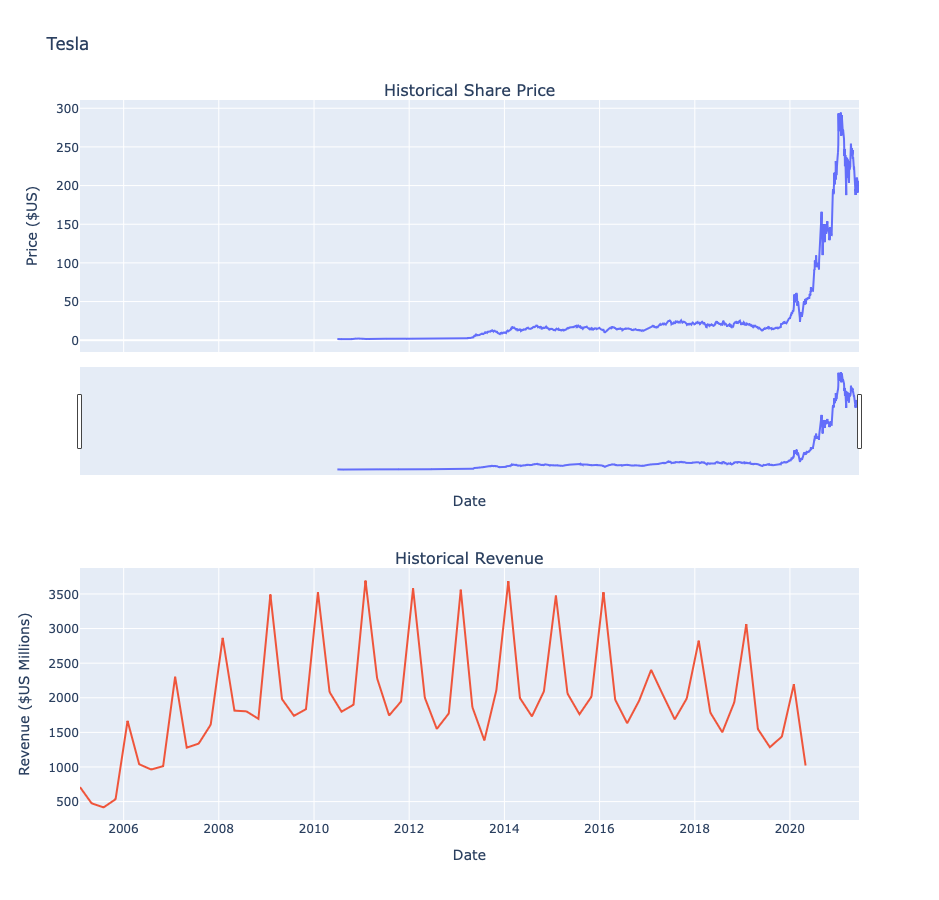

In [26]:
make_graph(tsla_data, gme_revenue, 'Tesla')

In [27]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)  

/tmp/ipykernel_158/3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_158/3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



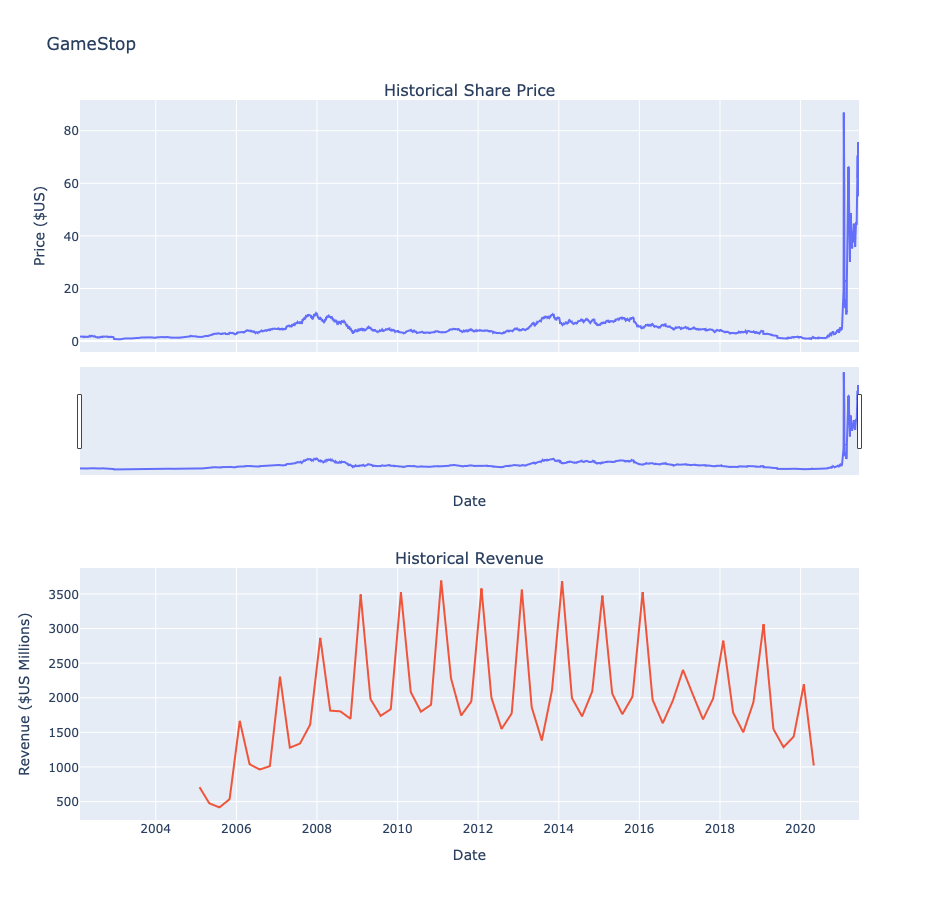

In [28]:
make_graph(gme_data, gme_revenue, 'GameStop')